In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.csv"
test_url  = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.csv"

train_df = pd.read_csv(train_url)
test_df  = pd.read_csv(test_url)

train_df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_test  = test_df.iloc[:, :-1]
y_test  = test_df.iloc[:, -1]

print(train_df.columns.tolist())
print(test_df.columns.tolist())

['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.18', '2', '2.1', '0.19', '0.20', '0.21', '0.22', '1', '0.23', '0.24', '150', '25', '0.17', '0.03', '0.17.1', '0.25', '0.26', '0.27', '0.05', '0.28', 'normal', '20']
['0', 'tcp', 'private', 'REJ', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '229', '10', '0.19', '0.20', '1', '1.1', '0.04', '0.06', '0.21', '255', '10.1', '0.04.1', '0.06.1', '0.22', '0.23', '0.24', '0.25', '1.2', '1.3', 'neptune', '21']


In [ ]:
col_names = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
    "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
    "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login",
    "is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
    "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serr_rate","dst_host_srv_serr_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack","difficulty"
]

train_df = pd.read_csv(train_url, names=col_names)
test_df  = pd.read_csv(test_url, names=col_names)

print(train_df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

In [ ]:
from sklearn.preprocessing import LabelEncoder

X_train = train_df.iloc[:, :-2].copy()
y_train = train_df['attack'].copy()

X_test  = test_df.iloc[:, :-2].copy()
y_test  = test_df['attack'].copy()

cat_cols = ['protocol_type','service','flag']

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = X_train[col].astype(str)
    X_test[col]  = X_test[col].astype(str)

    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])

    X_test[col] = X_test[col].apply(
        lambda x: le.transform([x])[0] if x in le.classes_ else -1
    )

print("Data cleaned and encoded successfully!")

Data cleaned and encoded successfully!


In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {acc:.4f}")

Accuracy on test data: 0.7170


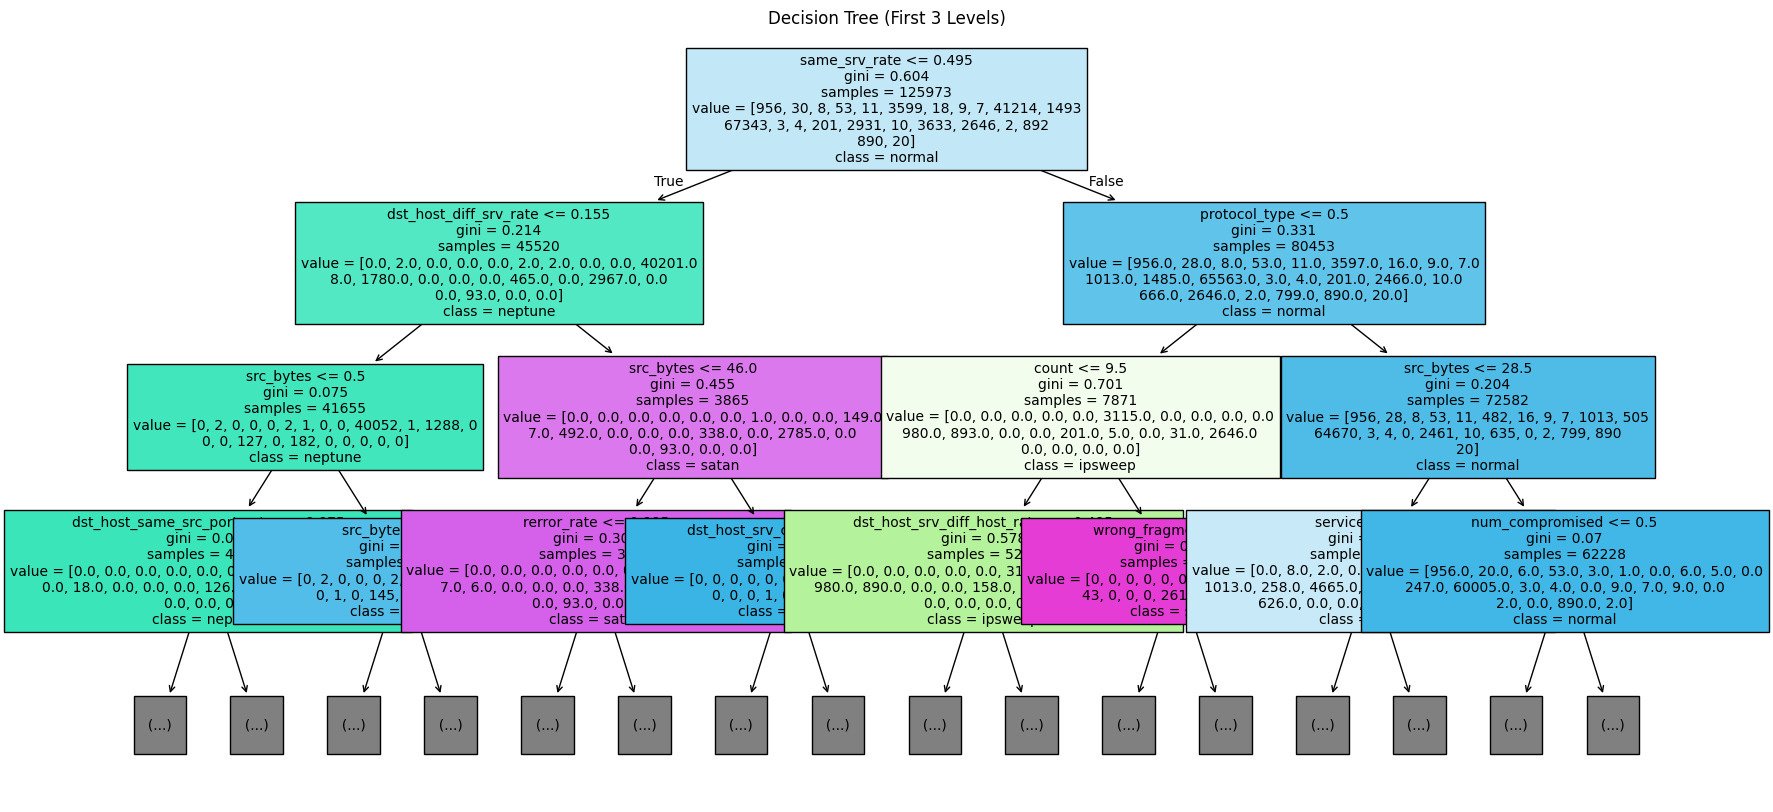

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf, max_depth=3, feature_names=X_train.columns, class_names=clf.classes_, filled=True, fontsize=10)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

In [ ]:
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred
print(results.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       49     1          0          0     0   
1         0              1       49     1          0          0     0   
2         2              1       20     9      12983          0     0   
3         0              0       14     9         20          0     0   
4         1              1       60     2          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2       

/tmp/ipython-input-474578126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df['attack'], order=train_df['attack'].value_counts().index, palette="coolwarm")
/tmp/ipython-input-474578126.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df['protocol_type'], palette="viridis")
/tmp/ipython-input-474578126.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df['service'], order=train_df['service'].value_counts().index, palette="magma")


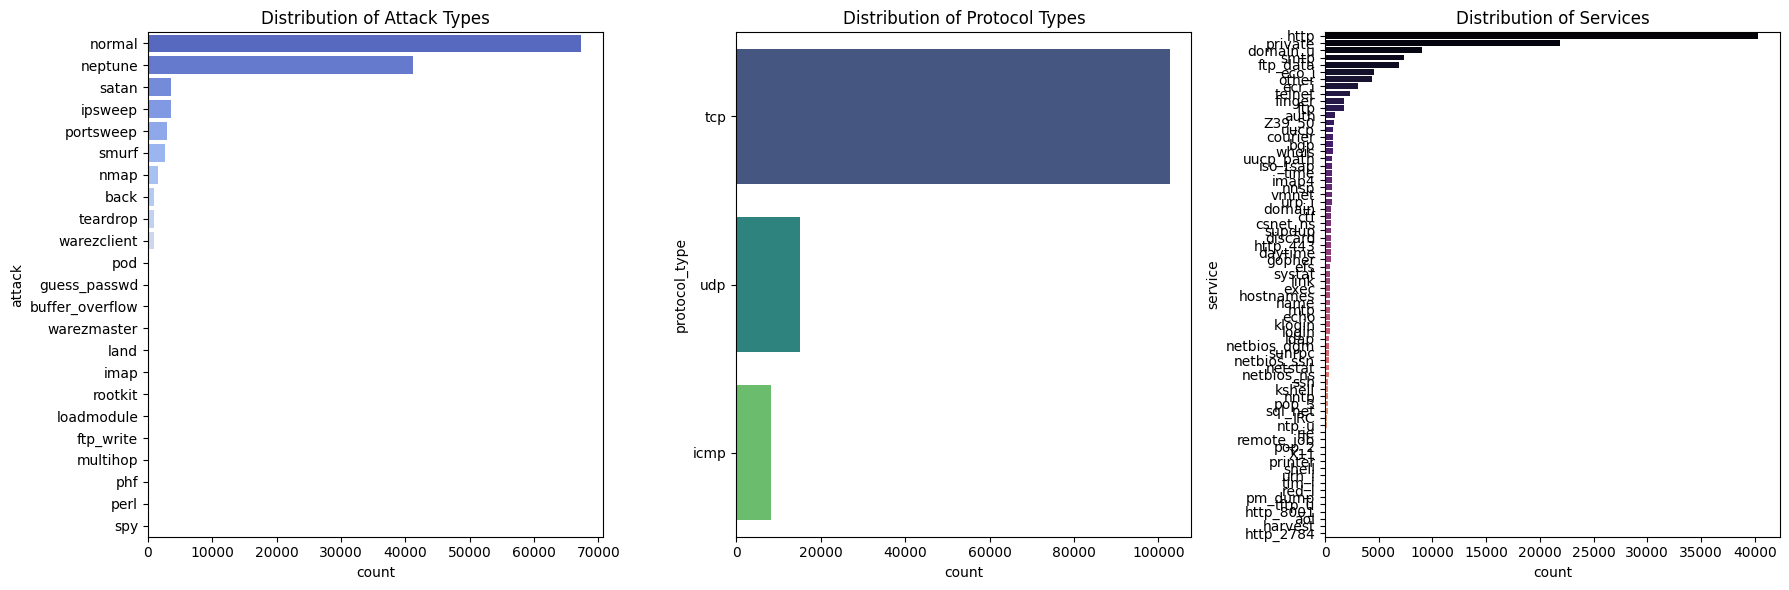

In [ ]:
plt.figure(figsize=(18,6))

# 1- توزيع نوع الهجوم
plt.subplot(1,3,1)
sns.countplot(y=train_df['attack'], order=train_df['attack'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Attack Types")

# 2- توزيع البروتوكول
plt.subplot(1,3,2)
sns.countplot(y=train_df['protocol_type'], palette="viridis")
plt.title("Distribution of Protocol Types")

# 3- توزيع الخدمة
plt.subplot(1,3,3)
sns.countplot(y=train_df['service'], order=train_df['service'].value_counts().index, palette="magma")
plt.title("Distribution of Services")

plt.tight_layout()
plt.savefig("data_dashboard.png")
plt.show()

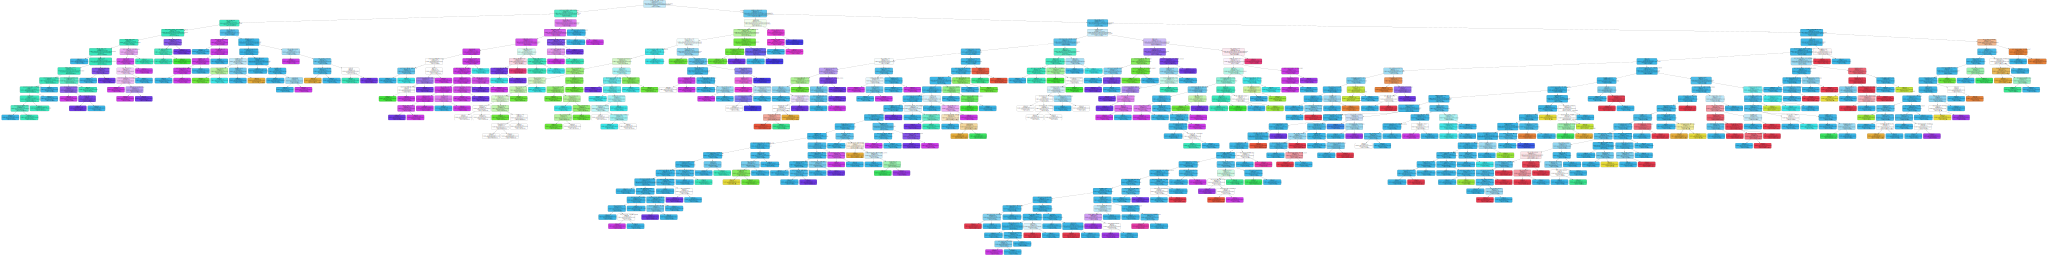

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source

dot = export_graphviz(
    clf,
    out_file=None,
    feature_names=X_train.columns,
    class_names=[str(c) for c in clf.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = Source(dot)
graph

In [ ]:
graph.format = 'png'
graph.render("decision_tree")

graph.format = 'pdf'
graph.render("decision_tree")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.772934 to fit


'decision_tree.pdf'

In [29]:
# ============================================================
#  مشروع: أمان المستقبل | Demo Code (Google Colab)
#  الفكرة: المرور بحركة شبكة وهمية → استخراج خصائص → تصنيف آني → عرض النتائج
# ============================================================
{ def analyze_packet():

    df_packet = pd.DataFrame([packet])
    prediction = model.predict(df_packet)[0]
    status = "⚠️ هجوم محتمل" if prediction == 1 else "✅ آمن"

    display(HTML(f"""
    <div style='padding:15px; margin:10px 0;
                background:#111; color:white; border-radius:10px;
                font-size:18px'>
        <b>📡 حركة شبكة جديدة detected</b><br><br>
        <b>الحجم:</b> {packet['packet_size']}<br>
        <b>المدة:</b> {packet['duration']:.2f}s<br>
        <b>مصدر:</b> {packet['source_score']}<br>
        <b>وجهة:</b> {packet['destination_score']}<br><br>
        <b>💡 النتيجة:</b> <span style='color:{"#ff4444" if prediction==1 else "#00e676"}'>{status}</span>
    </div>
    """))
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
import time
import random

# ----------------------------
# 1) إنشاء بيانات شبكة وهمية
# ----------------------------
def generate_network_data(n=200):
    data = {
        "packet_size": np.random.randint(50, 1500, n),
        "duration": np.random.random(n) * 5,
        "source_score": np.random.randint(1, 10, n),
        "destination_score": np.random.randint(1, 10, n),
        "is_attack": np.random.choice([0, 1], n, p=[0.85, 0.15])
    }
    return pd.DataFrame(data)

df = generate_network_data()

# ----------------------------
# 2) تدريب نموذج Decision Tree
# ----------------------------
X = df.drop("is_attack", axis=1)
y = df["is_attack"]

model = DecisionTreeClassifier(max_depth=4)
model.fit(X, y)

print("✔️ Model Trained Successfully\n")

# ----------------------------
# 3) دالة لمحاكاة فحص الحركة الفورية
# ----------------------------
def analyze_packet():
    packet = {
        "packet_size": random.randint(50,1500),
        "duration": random.random()*5,
        "source_score": random.randint(1,10),
        "destination_score": random.randint(1,10)
    }  

# ----------------------------
# 4) تشغيل لوحة المراقبة المبسطة
# ----------------------------
print("🔵 Real-Time Security Dashboard Running...\n")

for i in range(8):
    analyze_packet()
    time.sleep(1)

SyntaxError: invalid syntax (2765969723.py, line 5)

In [31]:
# نموذج بسيط يبين Attack أو Safe

value = float(input("ادخلي قيمة الترافيك او السلوك الشبكي: "))

threshold = 0.7  # نسبة تحدد إذا فيه هجوم او لا

if value >= threshold:
    print("🔴 احتمالية هجوم (Attack Detected)")
else:
    print("🟢 الوضع آمن (Safe)")

🔴 احتمالية هجوم (Attack Detected)


In [2]:
!pip install joblib

zsh:1: command not found: pip


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import joblib
import numpy as np

# تحميل البيانات
url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.csv"
df = pd.read_csv(url)

# تحويل البيانات النصية لأرقام (TCP و UDP وغيرها)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# تقسيم البيانات
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب النموذج
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 1) ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]  # لو ثنائي، ممكن تعدلي لو متعدد
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=y_test.unique()[1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.close()

# 2) Distribution of attack types
attack_counts = y.value_counts()
plt.figure()
attack_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Attack Types')
plt.ylabel('Count')
plt.savefig('distribution1.png')
plt.close()

# 3) Top 10 feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[-10:][::-1]  # أكبر 10 ميزات
plt.figure(figsize=(8,6))
plt.bar(range(10), importances[indices], color='orange', align='center')
plt.xticks(range(10), X.columns[indices], rotation=45)
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.savefig('distribution2.png')
plt.close()

print("تم حفظ الصور: roc.png, distribution1.png, distribution2.png")

Matplotlib is building the font cache; this may take a moment.


تم حفظ الصور: roc.png, distribution1.png, distribution2.png


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
import joblib

In [17]:
import pandas as pd

url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.csv"

columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
    'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds','is_host_login',
    'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
    'dst_host_srv_rerror_rate','label'
]

df = pd.read_csv(url, names=columns)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [18]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['protocol_type', 'service', 'flag', 'label']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
for col in df.columns:
    if df[col].dtype == 'object':
        print("عمود نصي غير مشفّر:", col)

عمود نصي غير مشفّر: duration
عمود نصي غير مشفّر: dst_host_srv_rerror_rate


In [20]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']